## CNN Autoencoder Model

An early attempt at a convolutional autoencoder. Each sample is converted into an image. Each character is translated into an 8 pixel line representing each of the 8 bits of the character.

The code runs, but predictive power is very poor. It needs work, but provided here as a starting point.

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

from sklearn.model_selection import train_test_split

In [158]:
data = pd.read_csv("data/subset.csv")
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [199]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,21511.026933,-0.208711,0.122291,0.720742,0.212312,-0.204250,0.088234,-0.120524,0.031103,0.347071,...,-0.033908,-0.123170,-0.041636,0.009084,0.132964,0.022850,0.012277,0.004787,79.863644,0.003133
std,12054.474984,1.844420,1.544027,1.609977,1.418612,1.417595,1.319748,1.290070,1.284092,1.256412,...,0.784686,0.640237,0.541199,0.591740,0.435747,0.510776,0.387675,0.273391,222.686041,0.055889
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,10235.750000,-0.950987,-0.449388,0.260535,-0.698415,-0.799721,-0.654424,-0.595615,-0.160191,-0.460244,...,-0.244641,-0.545956,-0.176504,-0.327292,-0.129615,-0.333946,-0.063428,-0.007913,6.540000,0.000000
50%,26325.000000,-0.248095,0.147365,0.844310,0.198729,-0.237166,-0.170861,-0.068120,0.036125,0.240485,...,-0.090476,-0.096763,-0.050515,0.062258,0.172484,-0.057180,0.008272,0.020500,20.000000,0.000000
75%,32277.000000,1.165687,0.784608,1.472752,1.095230,0.312612,0.473905,0.443899,0.294090,1.100934,...,0.083635,0.285367,0.075015,0.398398,0.415791,0.303347,0.089390,0.076488,71.000000,0.000000
max,35731.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [166]:
unlabeled = data.drop('Class', axis=1).astype(str)
#unlabeled = data.drop('Time', axis=1).astype(str)

measurer = np.vectorize(len)

#columnLengths = measurer(unlabeled.values.astype(str)).max(axis=0)
columnLengths = measurer(unlabeled).max(axis=0)

In [167]:
columnLengths

array([ 7, 22, 23, 23, 22, 23, 23, 23, 23, 23, 23, 23, 22, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,  7])

In [190]:
images = []

nCols = len(columnLengths)
img_cols = int(sum(columnLengths)/2 + 0.5) << 1
img_rows = 8
for index, row in unlabeled.iterrows():
    image = np.zeros((img_rows, img_cols))
    start = 0
    for col in range(nCols):
        chars = list(row[col])
        i = 0
        for char in chars:
            bits = [1 if digit=='1' else 0 for digit in bin(ord(char) | 1<<img_rows)[3:]]
            image[:,start+i] = bits
            i += 1
        start += columnLengths[col]
    images.append(image)
    if (len(images) % 5000 == 0):
        print(len(images))

5000
10000
15000
20000
25000
30000


In [191]:
x_train, x_test = train_test_split(np.asarray(images), test_size=0.2)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

input_shape

(8, 656, 1)

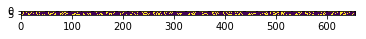

In [192]:
plt.imshow(x_train[1].reshape(img_rows, img_cols)*255)

In [193]:
input_img = Input(shape=input_shape)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

model = Model(input_img, decoded)
model.compile(optimizer='adadelta', loss='binary_crossentropy')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 8, 656, 1)         0         
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 8, 656, 16)        160       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 4, 328, 16)        0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 4, 328, 8)         1160      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 2, 164, 8)         0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 2, 164, 8)         584       
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 2, 164, 8)         584       
__________

In [194]:
batch_size = 128
epochs = 5

history = model.fit(x_train, x_train, batch_size=batch_size, shuffle=True,
                    validation_data=(x_test, x_test), epochs=epochs, verbose=1)

Train on 24000 samples, validate on 6000 samples
Epoch 1/5
24000/24000 [==============================] - 102s 4ms/step - loss: 0.3927 - val_loss: 0.3092
Epoch 2/5
24000/24000 [==============================] - 101s 4ms/step - loss: 0.2931 - val_loss: 0.2808
Epoch 3/5
24000/24000 [==============================] - 101s 4ms/step - loss: 0.2751 - val_loss: 0.2686
Epoch 4/5
24000/24000 [==============================] - 101s 4ms/step - loss: 0.2635 - val_loss: 0.2595
Epoch 5/5
24000/24000 [==============================] - 101s 4ms/step - loss: 0.2568 - val_loss: 0.2534


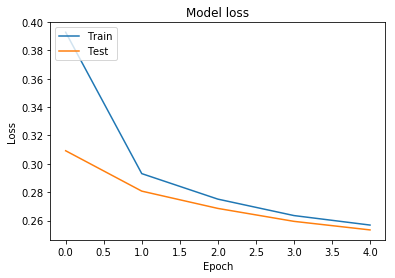

In [195]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [196]:
predictions = model.predict(x_test)
ps = predictions.shape
predictions = predictions.reshape(ps[0], ps[1]*ps[2])
x_test = x_test.reshape(ps[0], ps[1]*ps[2])

In [197]:
mse = np.sum(np.power(x_test - predictions, 2), axis=1)

mse /= float(ps[1]*ps[2])

y_train, y_test = train_test_split(data['Class'], test_size=0.2)

error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})
error_df.head(5)

,reconstruction_error,true_class
19615,0.087583,0
18101,0.088110,0
4570,0.085555,0
419,0.087845,0
3216,0.084987,0


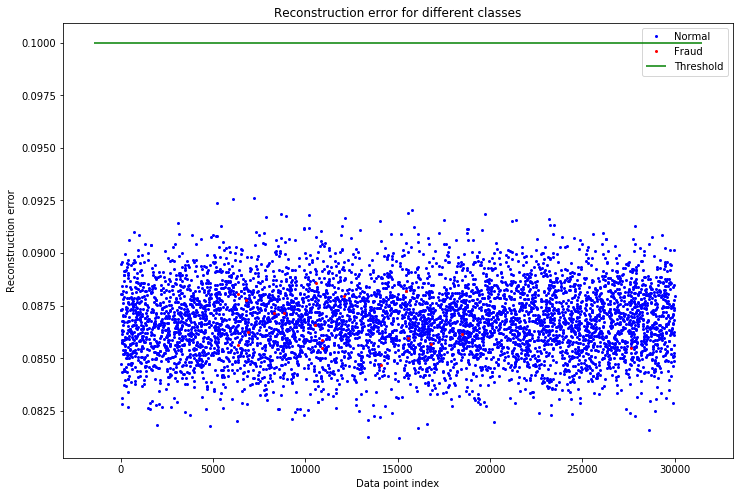

In [198]:
threshold = 0.1

groups = error_df.groupby('true_class')
fig, ax = plt.subplots(figsize=(12, 8))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=2.0, linestyle='',
            label = "Fraud" if name == 1 else "Normal",
            color = "red" if name == 1 else "blue")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="green", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();